<a href="https://colab.research.google.com/github/zahraElz/London-Mobility/blob/main/London_Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LONDON MOBILITY**

London's transport network is one of the busiest and most diverse in the world, with buses, the Underground, trams, Overground, DLR, and the Cable Car moving millions of passengers each month. This notebook explores TfL journey data from 2011 to 2025, analysing trends, comparing modes, uncovering seasonal patterns, and examining how events like the Olympics and COVID-19 have shaped travel across the city.

**DATA CLEANING**

Before starting the analysis, the dataset needed some preparation to ensure accuracy and consistency. This included converting date columns to datetime format, standardising column names, handling missing values, and removing duplicates.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
url = "https://raw.githubusercontent.com/zahraElz/London-Mobility/refs/heads/main/data/tfl-journeys-type.csv"
df = pd.read_csv(url)

#Quick overview of dataset structure and missing values
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period and Financial year      185 non-null    object 
 1   Reporting Period               185 non-null    int64  
 2   Days in period                 185 non-null    int64  
 3   Period beginning               185 non-null    object 
 4   Period ending                  185 non-null    object 
 5   Bus journeys (m)               185 non-null    float64
 6   Underground journeys (m)       185 non-null    float64
 7   DLR Journeys (m)               185 non-null    float64
 8   Tram Journeys (m)              185 non-null    float64
 9   Overground Journeys (m)        178 non-null    float64
 10  London Cable Car Journeys (m)  156 non-null    float64
 11  TfL Rail Journeys (m)          119 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1

,0
Period and Financial year,0
Reporting Period,0
Days in period,0
Period beginning,0
Period ending,0
Bus journeys (m),0
Underground journeys (m),0
DLR Journeys (m),0
Tram Journeys (m),0
Overground Journeys (m),7


In [ ]:
#Convert date columns to datatime format for easier manipulation
df['Period beginning'] = pd.to_datetime(df['Period beginning'], format='%d-%b-%y')
df['Period ending'] = pd.to_datetime(df['Period ending'], format='%d-%b-%y')

In [ ]:
#Standardise column names: lowercase, replace spaces, remove special characters
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

In [ ]:
#Handle missing data in the journey columns by replacing NaNs with 0
journey_cols = ['overground_journeys_m', 'london_cable_car_journeys_m', 'tfl_rail_journeys_m']
df[journey_cols] = df[journey_cols].fillna(0)

In [ ]:
#Remove duplicate rows
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
#Save cleaned dataset
os.makedirs("data", exist_ok=True)
df.to_csv("data/tfl-journeys-type-cleaned.csv", index=False)

In [ ]:
df = pd.read_csv('data/tfl-journeys-type-cleaned.csv', parse_dates=['period_beginning', 'period_ending'])

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.describe()

,reporting_period,days_in_period,period_beginning,period_ending,bus_journeys_m,underground_journeys_m,dlr_journeys_m,tram_journeys_m,overground_journeys_m,london_cable_car_journeys_m,tfl_rail_journeys_m
count,185.000000,185.000000,185,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,6.918919,28.081081,2017-04-29 12:42:48.648648704,2017-05-26 14:55:08.108108032,158.595676,88.904865,7.590270,1.967568,11.041622,0.091676,3.831892
min,1.000000,26.000000,2010-04-01 00:00:00,2010-05-01 00:00:00,30.200000,5.700000,1.200000,0.400000,0.000000,0.000000,0.000000
25%,4.000000,28.000000,2013-10-13 00:00:00,2013-11-09 00:00:00,144.900000,84.900000,6.500000,1.700000,8.800000,0.060000,0.000000
50%,7.000000,28.000000,2017-04-30 00:00:00,2017-05-27 00:00:00,171.800000,93.700000,7.700000,2.100000,11.600000,0.100000,3.200000
75%,10.000000,28.000000,2020-11-15 00:00:00,2020-12-12 00:00:00,181.900000,104.400000,9.200000,2.300000,14.300000,0.120000,4.300000
max,13.000000,31.000000,2024-05-26 00:00:00,2024-06-22 00:00:00,207.500000,118.200000,10.600000,2.800000,17.800000,0.530000,17.800000
std,3.776201,0.650183,NaN,NaN,34.630664,23.545782,1.852264,0.470808,4.039889,0.066127,4.847916


In [ ]:
df.isnull().sum()

,0
period_and_financial_year,0
reporting_period,0
days_in_period,0
period_beginning,0
period_ending,0
bus_journeys_m,0
underground_journeys_m,0
dlr_journeys_m,0
tram_journeys_m,0
overground_journeys_m,0


A quick inspection of the dataset confirmed that journey counts are reasonable, with higher numbers of bus and underground journeys as expected, and no remaining missing values after cleaning.

**MAIN ANALYSIS**

We can now explore London's transport patterns over time. By looking at trends across different modes, we can identify which modes are most used by Londoners, how travel volumes change seasonally, and how major events influence journeys.

In [ ]:
#Create directory for plots
os.makedirs("plots", exist_ok=True)

**TRENDS ACROSS ALL MODES**

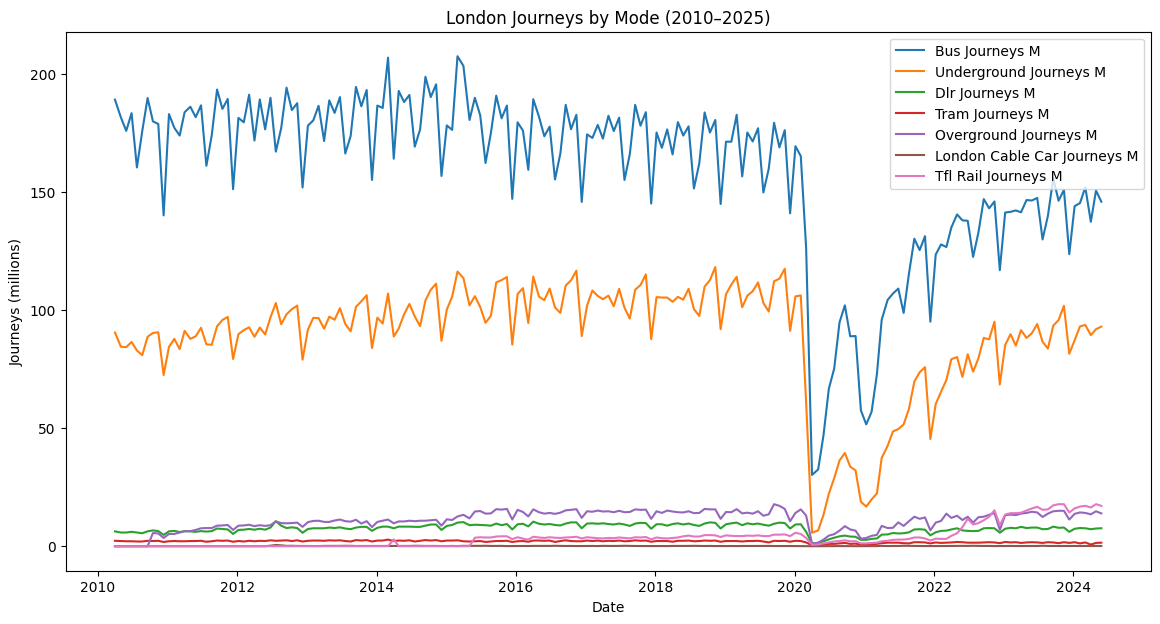

In [ ]:
plt.figure(figsize=(14,7))

for col in ['bus_journeys_m', 'underground_journeys_m', 'dlr_journeys_m',
            'tram_journeys_m', 'overground_journeys_m',
            'london_cable_car_journeys_m', 'tfl_rail_journeys_m']:
    plt.plot(df['period_beginning'], df[col], label=col.replace('_', ' ').title())

plt.legend()
plt.title('London Journeys by Mode (2010–2025)')
plt.xlabel('Date')
plt.ylabel('Journeys (millions)')
plt.savefig('plots/trends.png',  dpi=300, bbox_inches="tight")
plt.show()


Most transport modes show steady trends over time, with a sharp drop around 2020 due to COVID-19. Buses and the Underground dominate in volume, while London Cable Car journeys remain very low and seasonal. Given buses' overall dominance, it's worth looking closer at when bus journeys reached their peak.

**PEAK BUS JOURNEYS**

In [ ]:
df.loc[df['bus_journeys_m'].idxmax()]

,64
period_and_financial_year,13_14/15
reporting_period,13
days_in_period,31
period_beginning,2015-03-01 00:00:00
period_ending,2015-03-31 00:00:00
bus_journeys_m,207.5
underground_journeys_m,116.3
dlr_journeys_m,10.0
tram_journeys_m,2.5
overground_journeys_m,12.6


**BUS JOURNEYS OVER TIME**

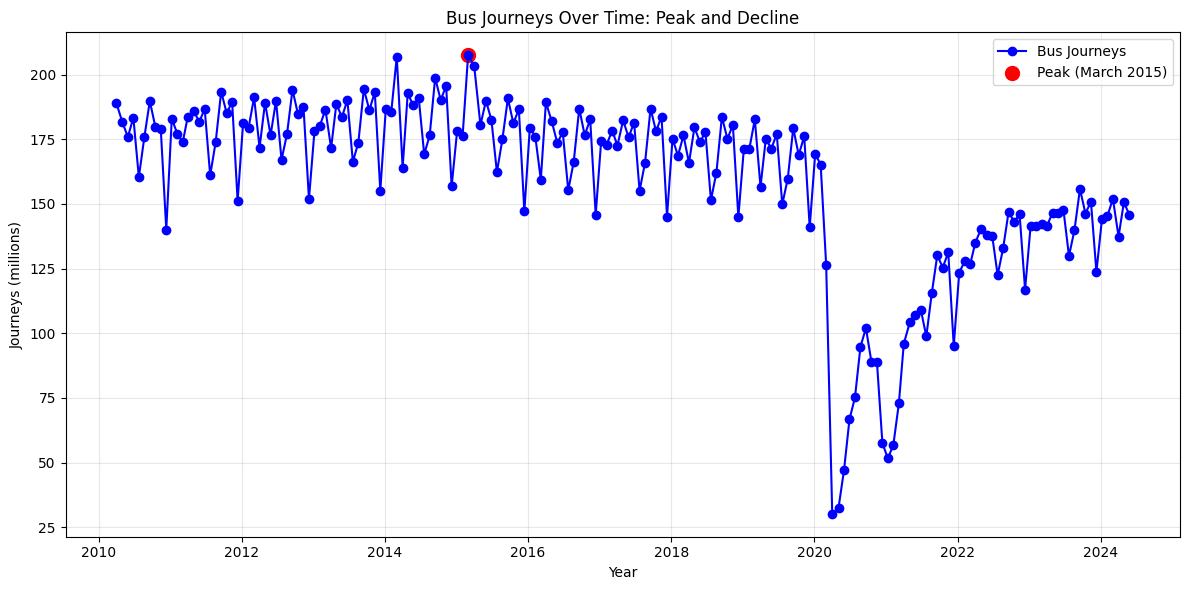

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['period_beginning'], df['bus_journeys_m'], color='blue', marker='o', label='Bus Journeys')


peak_idx = df['bus_journeys_m'].idxmax()
plt.scatter(df['period_beginning'][peak_idx], df['bus_journeys_m'][peak_idx],
            color='red', s=100, label='Peak (March 2015)')

plt.title("Bus Journeys Over Time: Peak and Decline")
plt.xlabel("Year")
plt.ylabel("Journeys (millions)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("plots/bus_over_time.png", dpi=300, bbox_inches="tight")
plt.show()

Bus journeys peaked in March 2014 and 2015, with the 2015 peak reaching 207.5 million, almost double the Underground's 116.3 million journeys at the same time. March seems to stand out in these years, probably because of TfL's reporting periods and seasonal factors like spring commuting, school terms, and favorable weather.

After 2015, bus usage declined, likely due to service cuts, more congestion, and competition from better rail and cycling options. TfL's 2018 Central London Bus Network review noted a 12% drop in demand over three years, linking it to upgrades to the Tube and Overground networks and investment in cycling and walking infrastructure.

**MODE COMPARISON: BUS vs UNDERGROUND**

Looking at these bus trends, it's clear that journeys rise and fall with the seasons, service changes, and new transport options. While buses once dominated, more Londoners now choose the Underground, cycling (e.g., Lime bikes), or walking. Let's compare bus and Underground travel to see which mode gets Londoners around the city most.

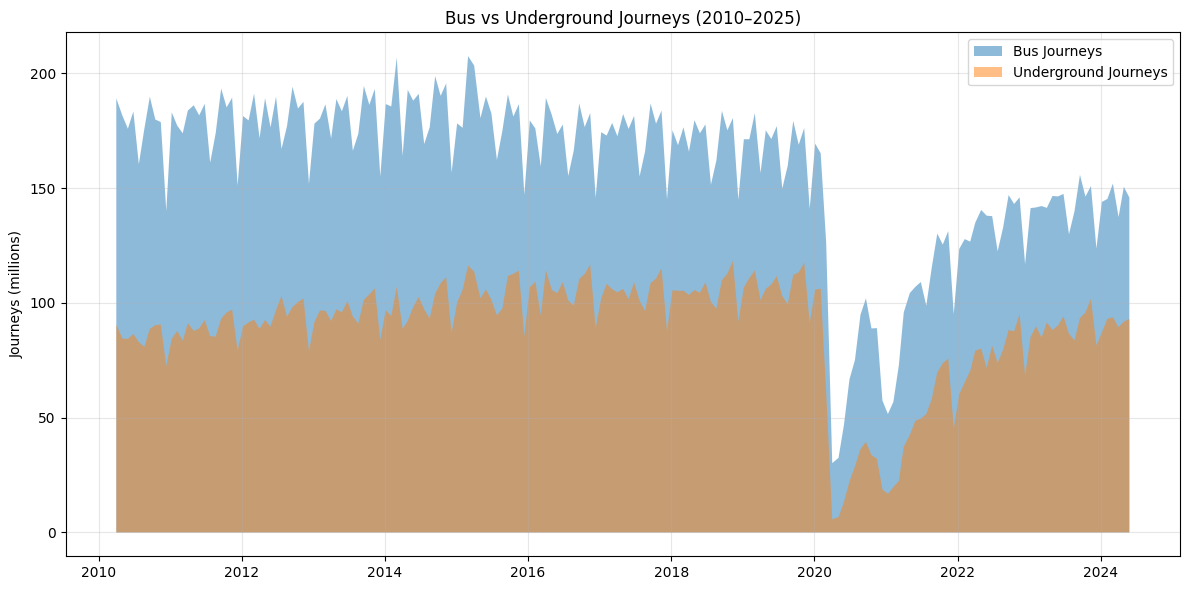

In [ ]:
import matplotlib.pyplot as plt

# Columns to plot and their clean labels
cols = ['bus_journeys_m', 'underground_journeys_m']
labels = ['Bus Journeys', 'Underground Journeys']

plt.figure(figsize=(12,6))
for col, label in zip(cols, labels):
    plt.fill_between(df['period_beginning'], df[col], alpha=0.5, label=label)

plt.title("Bus vs Underground Journeys (2010–2025)")
plt.ylabel("Journeys (millions)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("plots/bus_vs_underground.png", dpi=300, bbox_inches="tight")
plt.show()


Both modes fell sharply in 2020, yet bus journeys recovered more quickly. Buses serve short, local trips and reach areas the Underground doesn't, which may explain their quicker recovery. With this in mind, we can now explore how travel patterns change throughout the year and uncover seasonal trends in London's transport usage.

**SEASONALITY ANALYSIS: AVERAGE BY MONTH**

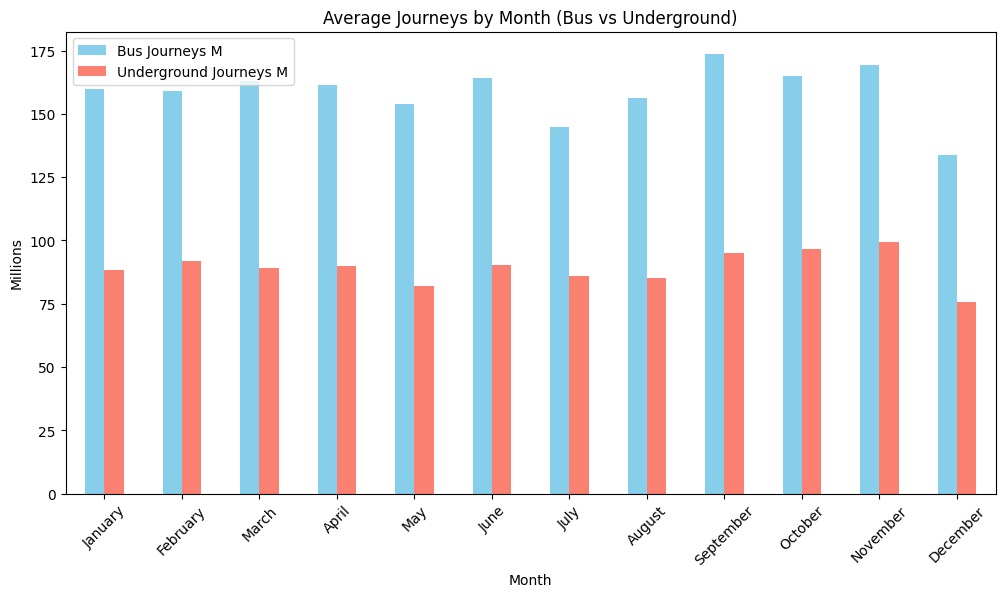

In [ ]:
import calendar

df['Month'] = df['period_beginning'].dt.month

monthly_avg = df.groupby('Month')[['bus_journeys_m','underground_journeys_m']].mean()

ax = monthly_avg.plot(kind='bar', figsize=(12,6), color=['skyblue','salmon'])

plt.title('Average Journeys by Month (Bus vs Underground)')
plt.ylabel('Millions')

ax.legend([col.replace('_',' ').title() for col in monthly_avg.columns])
ax.set_xticklabels([calendar.month_name[m] for m in monthly_avg.index], rotation=45)

plt.savefig('plots/seasonality.png', dpi=300, bbox_inches="tight")
plt.show()

Bus journeys stay consistently higher than Underground journeys throughout the year, with dips in July and December during the summer and winter holidays when fewer people commute regularly. Peaks appear in spring and autumn months, coinciding with school terms and more stable weather, suggesting that seasonal travel patterns strongly influence bus and Underground usage. Beyond these regular patterns, major events can also dramatically affect journeys, as we'll explore next.

** EVENT IMPACT ANALYSIS: 2012 OLYMPICS vs COVID-19**

Major events can cause sudden spikes or drops in journeys. From the excitement of the 2012 Olympics to the unprecedented disruption of COVID-19 in 2020, these events show how Londoners' travel habits can change dramatically in response to extraordinary circumstances.

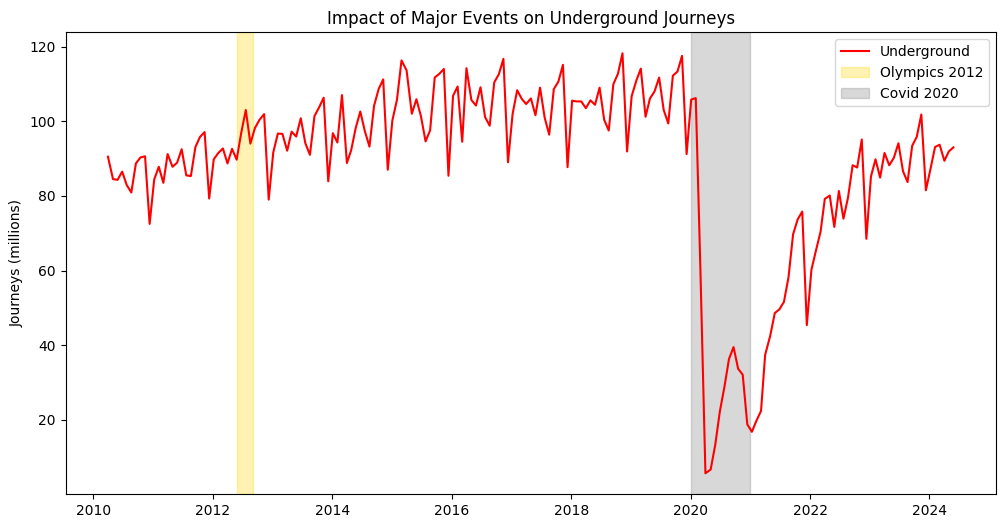

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['period_beginning'], df['underground_journeys_m'], label="Underground", color="red")

# Olympics highlight
ax.axvspan(pd.to_datetime('2012-06-01'), pd.to_datetime('2012-09-01'), color='gold', alpha=0.3, label="Olympics 2012")

# Covid highlight
ax.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'), color='grey', alpha=0.3, label="Covid 2020")

ax.set_title("Impact of Major Events on Underground Journeys")
ax.set_ylabel("Journeys (millions)")
ax.legend()
plt.savefig("plots/event_impact.png", dpi=300, bbox_inches="tight")
plt.show()

The 2012 Olympics temporarily boosted Underground journeys, reflecting the influx of visitors and increased travel demand in central London. In contrast, COVID-19 caused an unprecedented collapse in usage across all modes, with lockdowns and travel restrictions halting commuting and leisure travel. Together, these events show how both major planned occasions and sudden crises can dramatically reshape London's public transport patterns.

**REFLECTIONS:**

This project showed me that analysing transport data is about more than visualising numbers, it requires context. I observed that bus usage remained relatively resilient after COVID-19, whereas Underground journeys recovered more slowly. Part of this difference may be explained by cost: buses are cheaper than the Underground, and rising fares across public transport may have encouraged some travellers to seek more affordable options. The availability of alternatives such as Uber or cycling could also influence mode choice, although this analysis cannot directly capture these factors.

A key limitation is that the dataset covers only aggregate monthly journey counts, so it cannot reveal peak hour trends, demographic differences, or passenger satisfaction. Such insights would allow us to understand how Londoners use different transport modes at different times of day, which groups rely on which services, and how experiences vary across the network. Despite this, the project reinforced that quantitative data must be interpreted alongside real-world factors, economic, social, and behavioural, to gain a fuller picture of London's mobility patterns.